# Profitable Apps Profiles for AppStore and GooglePlay  (EN)
The main source of revenue of companies that build free Android and iOS apps consists of in-app ads. Thus, the more users that see and engage with the ads, the better.  
The objective of this project is to help the developers understand what type of apps are likely to attract more users. 

*NB: We can do a lot more on this project with the help of Pandas to manage the dataframes more effectively. But since I'm aiming to practice on the fundamental concepts in Python programming, I will only use lists, dictionaries and simple functions this time.*

### Opening and Exploring the Data 
For this project, we have two data sets:
* [A data set](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv) containing data about approximately 10,000 Android apps from Google Play. The data is collected in August 2018.
* [A data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store. The data was collected in July 2017.  

We'll start by opening and exploring these two data sets.

In [1]:
from csv import reader

### Create a function to open the two datasets ###
def opening(file_name):
    opened_file=open(file_name, encoding='utf-8')
    read_file=reader(opened_file)
    data=list(read_file)
    header=data[0]
    data=data[1:]
    return header, data

# iOS apps dataset
ios_header, ios=opening('AppleStore.csv')

# Android apps dataset
android_header, android=opening('googleplaystore.csv')

In [2]:
### Create a function to explore the two datasets ###
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice=dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')
    
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

#### The `ios` dataset:

In [3]:
# Explore the iOS dataset
print("Exploring the iOS dataset: \n")
print(ios_header,'\n')
explore_data(dataset=ios,start=0,end=3, rows_and_columns=True)

Exploring the iOS dataset: 

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'] 

['281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


Number of rows: 7197
Number of columns: 16


The `ios` dataset has 7197 rows and 16 columns.  
The columns that might be useful for our analysis are:

|Column|Description|
|:---|:---|
|track_name|App Name|
|currency|Currency Type|
|price|Price amount|
|ratingcounttot|User Rating counts (for all version)|
|ratingcountver|User Rating counts (for current version)|
|prime_genre|Primary Genre|

#### The `android` dataset:

In [4]:
#Explore the Android dataset
print("Exploring the Android dataset \n")
print(android_header,'\n')
explore_data(dataset=android, start=0, end=3, rows_and_columns=True)

Exploring the Android dataset 

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


The `android` dataset has 10841 rows and 13 columns.  
The columns that might be useful for our analysis are:

| Column | Description |
|:---|:--- |
|App|Application name|
|Category|Category the app belongs to|
|Reviews|Number of user reviews for the app (as when scraped)|
|Installs|Number of user downloads/installs for the app (as when scraped)|
|Type|Paid of Free|
|Price|Price of the app (as when scraped)|
|Genres|An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.|

More details about the datasets can be found in the documentations:
* [Android dataset](https://www.kaggle.com/lava18/google-play-store-apps/home)
* [iOS dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home)

### Data Cleaning
In this step, we will make sure the data is accurate before jumping into any analysis. To do this, we need to:
* Detect inaccurate data and correct or remove it
* Detect duplicate data and remove the duplicates

At our company, we only build free apps that are directed toward an English-speaking audience. This means that we'll need to:
* Remove non-English apps
* Remove apps that aren't free

#### Detecting inaccurate data
As reported in [one of the discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015), there's an error on row 10472 of `android` dataset. We will check if it's true:

In [5]:
print(android_header,'\n') #the header
print(android[0],'\n') #normal row
print(android[10472]) # row with error

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'] 

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


In fact, if we compare the length of row n°10472 with a normal row, we will see a difference:

In [6]:
print("Length of a normal row:",len(android[0]))
print("Length of row 10472:", len(android[10472]))

Length of a normal row: 13
Length of row 10472: 12


We can also try to detect abnormal rows like this one using a for loop:

In [7]:
def check_for_abnormal(dataset, header):
    header_length=len(header)
    for row in dataset:
        row_length=len(row)
        if row_length!=header_length:
            print("Error on row:",dataset.index(row))
            print(row,'\n')
    print("Finished!")

In [8]:
check_for_abnormal(dataset=android,header=android_header)

Error on row: 10472
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up'] 

Finished!


The information in column `Category` of the incorrect row is missing. For the purpose of this exercise, we can delete this row.

In [9]:
del android[10472]

We will do the same on `ios` dataset 

In [10]:
check_for_abnormal(dataset=ios,header=ios_header)

Finished!


#### Detecting duplicates
Next, we check if there's any duplicates in the datasets.

In [11]:
def check_duplicate(dataset, index): #index of the column containing apps name
    app_dict={}
    for row in dataset:
        app_name=row[index]
        if app_name in app_dict:
            app_dict[app_name]+=1
        else:
            app_dict[app_name]=1
    result={key:value for key,value in app_dict.items() if value>1}
    print("Number of duplicated apps:",sum(result.values())-len(result))
    if result=={}:
        print("The data set doesn't have any duplicate entries")
    else:
        return result

`ios` dataset doesn't have any duplicated apps:

In [12]:
check_duplicate(dataset=ios,index=0)

Number of duplicated apps: 0
The data set doesn't have any duplicate entries


`android` dataset has 1181 duplicated apps:

In [13]:
check_duplicate(dataset=android, index=0)

Number of duplicated apps: 1181


{'Coloring book moana': 2,
 'Mcqueen Coloring pages': 2,
 'UNICORN - Color By Number & Pixel Art Coloring': 2,
 'Textgram - write on photos': 2,
 'Wattpad 📖 Free Books': 2,
 'Amazon Kindle': 2,
 'Dictionary - Merriam-Webster': 2,
 'NOOK: Read eBooks & Magazines': 2,
 'Oxford Dictionary of English : Free': 2,
 'Spanish English Translator': 2,
 'NOOK App for NOOK Devices': 2,
 'Ebook Reader': 2,
 'English Dictionary - Offline': 2,
 'Docs To Go™ Free Office Suite': 2,
 'Google My Business': 3,
 'OfficeSuite : Free Office + PDF Editor': 2,
 'Curriculum vitae App CV Builder Free Resume Maker': 2,
 'Facebook Pages Manager': 2,
 'Box': 3,
 'Call Blocker': 2,
 'ZOOM Cloud Meetings': 2,
 'Facebook Ads Manager': 2,
 'Quick PDF Scanner + OCR FREE': 3,
 'SignEasy | Sign and Fill PDF and other Documents': 2,
 'Genius Scan - PDF Scanner': 2,
 'Tiny Scanner - PDF Scanner App': 2,
 'Fast Scanner : Free PDF Scan': 2,
 'Mobile Doc Scanner (MDScan) Lite': 2,
 'TurboScan: scan documents and receipts in PD

We don't want to count an app more than once when we analyze data, so we need to remove the duplicate entries. But also, we can't remove the duplicate rows randomly because the data was collected at different times. Therefore, we will keep the row with the highest number of reviews because it corresponds to the latest data.

In [14]:
def remove_duplicate(dataset,index_app,index_count):
    reviews_max={}
    for row in dataset:
        name=row[index_app]
        n_reviews=float(row[index_count])
        if (name in reviews_max) and (n_reviews>reviews_max[name]):
            reviews_max[name]=n_reviews
        elif name not in reviews_max:
            reviews_max[name]=n_reviews
    print("Number of unique apps:", len(reviews_max))
    return reviews_max
print('On android dataset:')
reviews_android=remove_duplicate(dataset=android,index_app=0,index_count=3)

On android dataset:
Number of unique apps: 9659


In [15]:
def cleaning(dataset, unique_app, index_app, index_count):
    clean=[]
    already_added=[]
    for row in dataset:
        name=row[index_app]
        n_reviews=float(row[index_count])
        if (n_reviews==unique_app[name]) and (name not in already_added):
            clean.append(row)
            already_added.append(name)
    print("Number of rows after removing duplicate entries:",len(clean))
    return clean
print("Start cleaning the android dataset:")
android_clean=cleaning(dataset=android, unique_app=reviews_android, index_app=0, index_count=3)


Start cleaning the android dataset:
Number of rows after removing duplicate entries: 9659


#### Removing Non English Apps
Since our company targets an English-speaking audience, we should only analyze English apps.  
According to the [ASCII system](https://en.wikipedia.org/wiki/ASCII), the characters commonly used in English are encoded to numbers in the range of 0 to 127. Based on this information, we will build a function that detects whether a character belongs to the common English characters or not. Precisely, if the number is equal or less than 127, then the character belongs to the set of common English characters.

In [16]:
# Function takes in a string and returns `False` if there's any character in the
# string that doesn't belong to the set of common English characters. It returns
# `True` otherwise.

def english_or_not(string):
    for character in string:
        if ord(character)>127:
            return False
    return True

However, certain English app names contain special characters that fall outside the ASCII range. For example:

In [17]:
print(english_or_not('Docs To Go™ Free Office Suite'))
ord("™")

False


8482

To minimize the impact of data loss, we will only remove an app if its name has more than three characters with corresponding numbers falling outside the ASCII range.

In [18]:
# Modify the previous function. It returns False if there's more than 3 characters
# that fall outside of the ASCII range, it returns 'True' otherwise
def english_or_not(string):
    result=0
    for character in string:
        if ord(character)>127:
            result+=1
    if result>3:
        return False
    return True
print(english_or_not('Docs To Go™ Free Office Suite'))
print(english_or_not('Instachat 😜'))
print(english_or_not('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
True
False


The function works as expected. We will loop through each data set.

In [19]:
android_english=[]
ios_english=[]
for row in android_clean:
    name=row[0]
    is_english=english_or_not(name)
    if is_english:
        android_english.append(row)
        
for row in ios:
    name=row[1]
    is_english=english_or_not(name)
    if is_english:
        ios_english.append(row)

print('Explore android_english:\n')
explore_data(android_english,0,0,True)
print('-----------------------------------')
print('Explore ios_english:\n')
explore_data(ios_english,0,0,True)

Explore android_english:

Number of rows: 9614
Number of columns: 13
-----------------------------------
Explore ios_english:

Number of rows: 6183
Number of columns: 16


So far, we've removed the inaccurate data, duplicate entries and non-english apps. We're left with:
* **9614 Android apps**
* **6183 iOS apps**

#### Isolate the free apps

As mentioned above, we only build free apps and our main source of revenue consists of in-app ads. For that reason, we should only retain the free apps for our analysis.

In [20]:
# Define a function to isolate the free apps
def free_app(dataset, index_price):
    free=[]
    for row in dataset:
        price=row[index_price]
        if price in ('0','0.0'):
            free.append(row)
    return free

android_final=free_app(android_english,7)
ios_final=free_app(ios_english,4)

print('Explore android_final:\n')
explore_data(android_final,0,0,True)
print('-----------------------------')
print('Explore ios_final:\n')
explore_data(ios_final,0,0,True)

Explore android_final:

Number of rows: 8864
Number of columns: 13
-----------------------------
Explore ios_final:

Number of rows: 3222
Number of columns: 16


At the end of the data cleaning process, we're left with:
* 8864 Android apps
* 3222 iOS apps

We can move onto the next step: Analyzing the data.

### Analyzing the datasets

The objective of this analysis is to find out what kinds of apps are more likely to attract more users because our revenue is highly influenced by the number of people using our apps. Our validation strategy for an app idea is comprised of three steps:
1. Build a minimal Android version of the app and add it to Google Play
2. If the app has a good response from the users, we develop it further
3. If the app is profitable after six month, we build an iOS version of the app and add it to the App Store.


#### Most Common Genres

Since our end goal is to build apps that are successful on both markets, let's begin by determine what are the most common genres for each market. To do that, we will build a frequency table using the `Genre` or `Category` column for Android apps, and `prime_genre` column for iOS apps. 

In [21]:
def freq_table(dataset, index_genre):
    dict_genre={}
    n_rows=0
    for row in dataset:
        genre=row[index_genre]
        n_rows+=1
        if genre in dict_genre:
            dict_genre[genre]+=1
        else:
            dict_genre[genre]=1
    for key in dict_genre:
        dict_genre[key]=round((dict_genre[key]/n_rows)*100,3)
    print("Number of genres:",len(dict_genre))
    return dict_genre

print("Using 'Category' column")
cat_android=freq_table(dataset=android_final,index_genre=1)
print('----------------------------')
print("Using 'Genre' column")
genre_android=freq_table(dataset=android_final,index_genre=-4)
print('----------------------------')
print("Using 'prime_genre' column")
genre_ios=freq_table(dataset=ios_final,index_genre=-5)

Using 'Category' column
Number of genres: 33
----------------------------
Using 'Genre' column
Number of genres: 114
----------------------------
Using 'prime_genre' column
Number of genres: 23


We notice that the `Genre` column is much more granular because it contains more values. However, the difference between `Genre` and `Category` is not significative.

In [22]:
print('The values in "Genre":\n')
genre_android={k:v for k,v in sorted(genre_android.items(), key=lambda x:x[1], reverse=True)}
for key, val in genre_android.items():
    print(key,':',val)

The values in "Genre":

Tools : 8.45
Entertainment : 6.069
Education : 5.347
Business : 4.592
Lifestyle : 3.892
Productivity : 3.892
Finance : 3.7
Medical : 3.531
Sports : 3.463
Personalization : 3.317
Communication : 3.238
Action : 3.102
Health & Fitness : 3.08
Photography : 2.944
News & Magazines : 2.798
Social : 2.662
Travel & Local : 2.324
Shopping : 2.245
Books & Reference : 2.144
Simulation : 2.042
Dating : 1.861
Arcade : 1.85
Video Players & Editors : 1.771
Casual : 1.76
Maps & Navigation : 1.399
Food & Drink : 1.241
Puzzle : 1.128
Racing : 0.993
Libraries & Demo : 0.936
Role Playing : 0.936
Auto & Vehicles : 0.925
Strategy : 0.914
House & Home : 0.824
Weather : 0.801
Events : 0.711
Adventure : 0.677
Comics : 0.609
Art & Design : 0.598
Beauty : 0.598
Parenting : 0.496
Card : 0.451
Casino : 0.429
Trivia : 0.417
Educational;Education : 0.395
Board : 0.384
Educational : 0.372
Education;Education : 0.338
Word : 0.259
Casual;Pretend Play : 0.237
Music : 0.203
Entertainment;Music & Vi

In [23]:
print('The values in "Category":\n')
cat_android={k:v for k,v in sorted(cat_android.items(), key=lambda x:x[1], reverse=True)}
for key, val in cat_android.items():
    print(key,':',val)

The values in "Category":

FAMILY : 18.908
GAME : 9.725
TOOLS : 8.461
BUSINESS : 4.592
LIFESTYLE : 3.903
PRODUCTIVITY : 3.892
FINANCE : 3.7
MEDICAL : 3.531
SPORTS : 3.396
PERSONALIZATION : 3.317
COMMUNICATION : 3.238
HEALTH_AND_FITNESS : 3.08
PHOTOGRAPHY : 2.944
NEWS_AND_MAGAZINES : 2.798
SOCIAL : 2.662
TRAVEL_AND_LOCAL : 2.335
SHOPPING : 2.245
BOOKS_AND_REFERENCE : 2.144
DATING : 1.861
VIDEO_PLAYERS : 1.794
MAPS_AND_NAVIGATION : 1.399
FOOD_AND_DRINK : 1.241
EDUCATION : 1.162
ENTERTAINMENT : 0.959
LIBRARIES_AND_DEMO : 0.936
AUTO_AND_VEHICLES : 0.925
HOUSE_AND_HOME : 0.824
WEATHER : 0.801
EVENTS : 0.711
PARENTING : 0.654
ART_AND_DESIGN : 0.643
COMICS : 0.62
BEAUTY : 0.598


Since we're only looking for the big picture and the informations in the `Genre` column are sometimes redundant, we will work with the `Category` column for the next part.

In [24]:
print('The values in "prime_genre":\n')
genre_ios={k:v for k,v in sorted(genre_ios.items(), key=lambda x:x[1], reverse=True)}
for key, val in genre_ios.items():
    print(key,':',val)

The values in "prime_genre":

Games : 58.163
Entertainment : 7.883
Photo & Video : 4.966
Education : 3.662
Social Networking : 3.29
Shopping : 2.607
Utilities : 2.514
Sports : 2.142
Music : 2.048
Health & Fitness : 2.017
Productivity : 1.738
Lifestyle : 1.583
News : 1.335
Travel : 1.241
Finance : 1.117
Weather : 0.869
Food & Drink : 0.807
Reference : 0.559
Business : 0.528
Book : 0.435
Navigation : 0.186
Medical : 0.186
Catalogs : 0.124


We found that the most common genre on App Store is Games apps (58%). Meanwhile, the majority of Google Play apps belongs to the 'Family' category. This category was added in 2015 to improve app discovery. These apps are family-friendly and most of them are games for kids. Also we notice that Google Play has more balanced percentage.

Note that our dataset only contains free english apps, hence we might not see the same pattern on all the apps as a whole.

#### Most Popular Genre on the App Store

Now, we'd like to get an idea about the kind of apps with the most users. To do that, we will calculate the average number of installs for each genre. We will use the `Installs` column for the Google Play dataset and the `rating_count_tot` column for the App Store dataset.

In [25]:
def cal_avg(dataset, dict_genre, index_genre, index_tot): # function used to calculate the average of installs/rating counts per genre
    avg={}
    for genre in dict_genre:
        total=0
        n_rows=0
        for row in dataset:
            if row[index_genre]==genre:
                n_rows+=1
                total+=float(row[index_tot])
        avg[genre]=round(total/n_rows,2)
    avg={k:v for k,v in sorted(avg.items(), key=lambda x:x[1], reverse=True)}
    return avg

import matplotlib.pyplot as plt

def display_chart(key,value): # function used to show the bar charts
    y=list(key)
    x=list(value)
    plt.barh(y,x, 0.95, align='center', color="lightskyblue")
    plt.yticks(y)
    plt.gca().invert_yaxis()
    plt.rcParams["figure.figsize"] = (25,15)
    plt.rcParams.update({'font.size': 15})
    plt.show()

In [26]:
avg_ios=cal_avg(dataset=ios_final, dict_genre=genre_ios, index_genre=-5, index_tot=5)
for k, v in avg_ios.items():
    print(k,':',v)

Navigation : 86090.33
Reference : 74942.11
Social Networking : 71548.35
Music : 57326.53
Weather : 52279.89
Book : 39758.5
Food & Drink : 33333.92
Finance : 31467.94
Photo & Video : 28441.54
Travel : 28243.8
Shopping : 26919.69
Health & Fitness : 23298.02
Sports : 23008.9
Games : 22788.67
News : 21248.02
Productivity : 21028.41
Utilities : 18684.46
Lifestyle : 16485.76
Entertainment : 14029.83
Business : 7491.12
Education : 7003.98
Catalogs : 4004.0
Medical : 612.0


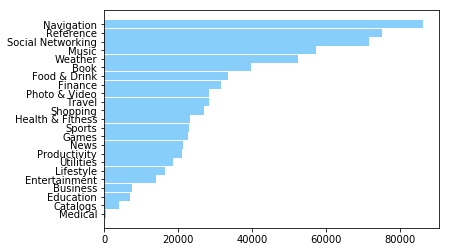

In [27]:
display_chart(key=avg_ios.keys(),value=avg_ios.values())

On average, 'Navigation' genre has the highest number of user reviews. This can be explained by the fact that apps like Google Maps or other GPS apps are helpful and are used everyday. It is also true for social networking apps like Facebok, Instagram, or Music apps like Shazam, Spotify. The metric seems to be skewed because of the giants. One possible solution is to remove these popular apps from our dataset.
We can filter the apps whose name starts with 'Google'. We will also remove other popular apps.

Reference : 77774.82
Weather : 52279.89
Social Networking : 42352.6
Book : 39758.5
Food & Drink : 33333.92
Finance : 31467.94
Shopping : 26919.69
Health & Fitness : 23298.02
Sports : 23008.9
Games : 22788.67
Music : 22017.19
News : 21248.02
Productivity : 19841.16
Travel : 18426.7
Lifestyle : 16485.76
Photo & Video : 14559.16
Entertainment : 14153.52
Utilities : 12520.5
Business : 7491.12
Education : 7013.06
Navigation : 4146.25
Catalogs : 4004.0
Medical : 612.0


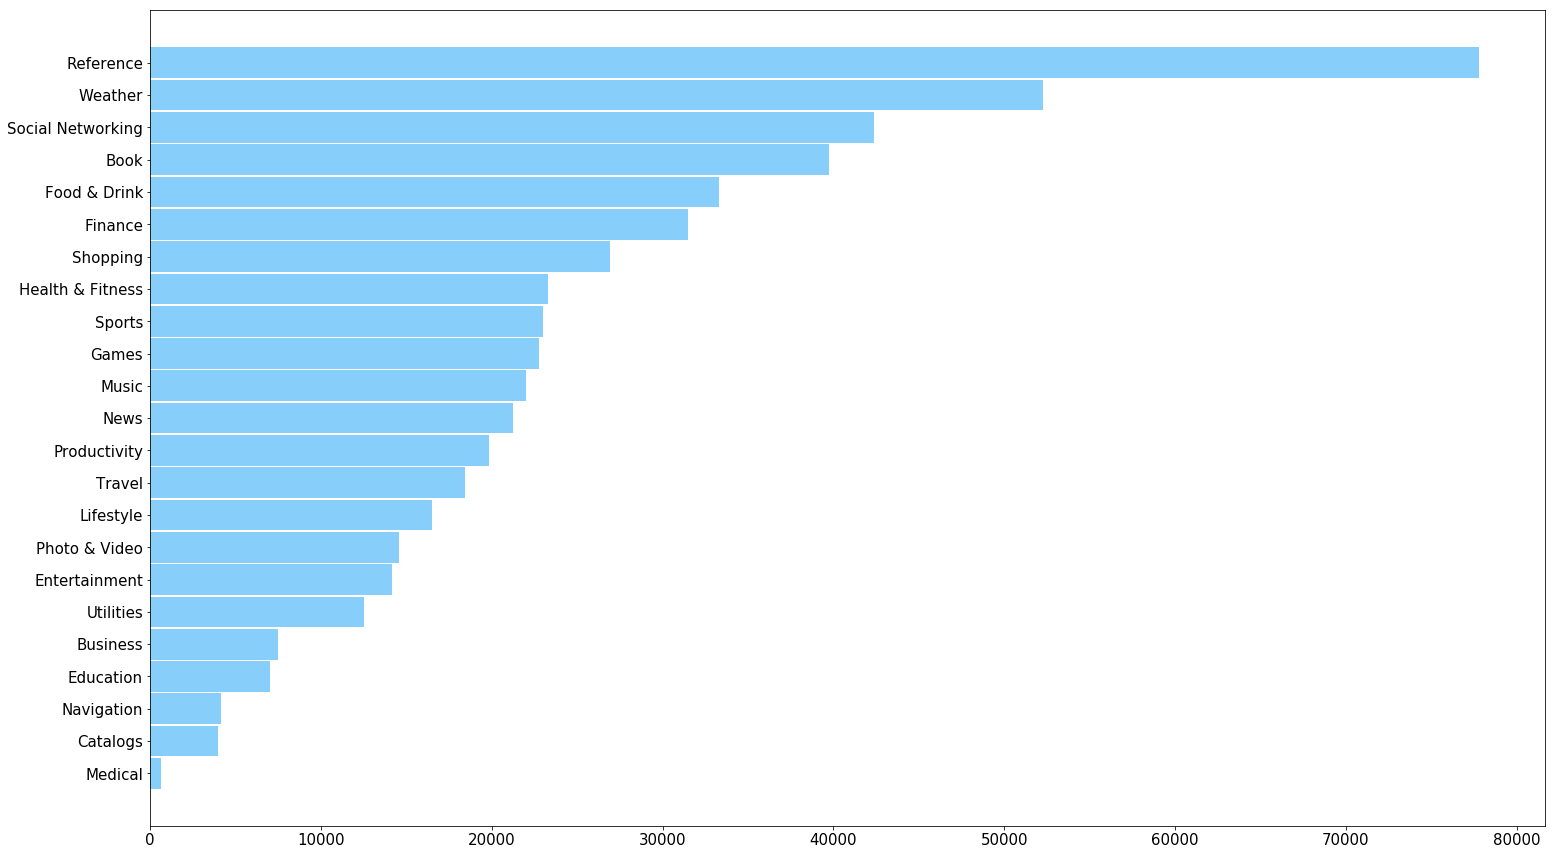

In [28]:
ios_filter=[]
for row in ios_final:
    if not ((row[1].startswith(('Google', 'Waze','Facebook', 'Youtube','Spotify', 'Pandora', 'Shazam', 'WhatsApp', 'Instagram'))==True)):
        ios_filter.append(row)

avg_ios_2=cal_avg(dataset=ios_filter, dict_genre=genre_ios, index_genre=-5, index_tot=5)
for k, v in avg_ios_2.items():
    print(k,':',v)
    
display_chart(key=avg_ios_2.keys(),value=avg_ios_2.values())

'Reference' apps seem to have many user ratings.

In [29]:
for row in ios_final:
    if row[-5]=='Reference':
        print(row[1], ':', row[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
Merriam-Webster Dictionary : 16849
Google Translate : 26786
Night Sky : 12122
WWDC : 762
Jishokun-Japanese English Dictionary & Translator : 0
教えて!goo : 0
VPN Express : 14
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Real Bike Traffic Rider Virtual Reality Glasses : 8


According to the results, we notice that iOS users seems to use references in general and dictionaries in particular frequently. Other popular genres are `Weather`, `Book`, `Food & Drink`.

#### Most Popular Genres on Google Play
For this market, we will use the number of installs of each genre to find out the most popular genre and compare with the results from the Apple Store dataset. 
However, if we investigate the `Installs` column, we will see that the values are not precise.

In [30]:
list_installs=[]
for row in android_final:
    list_installs.append(row[5])
print(set(list_installs))
print(len(set(list_installs))) #21 unique values

{'0+', '10,000+', '1,000+', '50,000,000+', '50+', '100+', '50,000+', '10+', '100,000,000+', '100,000+', '10,000,000+', '0', '500+', '1,000,000+', '5+', '5,000,000+', '500,000,000+', '1,000,000,000+', '1+', '5,000+', '500,000+'}
21


The data that we have doesn't allow us to see the exact number of installs. But it can help compare between the apps. Since we only want to know wihch genres attract the most users, we can still work with this column by calculating the average number of installs per genre.

First, we'll need to convert the number of installs from string to float.

In [31]:
list_installs=[]
for row in android_final:
    row[5]=row[5].replace('+','') # remove the '+'
    row[5]=row[5].replace(',','') # remove the ','
    row[5]=float(row[5])
    list_installs.append(row[5])
print(set(list_installs))
print(len(set(list_installs))) #20 unique values because 0+ became 0

{50000000.0, 10000000.0, 1000000000.0, 100000000.0, 500000000.0, 1.0, 5.0, 0.0, 5000.0, 10.0, 10000.0, 100000.0, 500000.0, 50.0, 5000000.0, 1000000.0, 50000.0, 100.0, 1000.0, 500.0}
20


In [32]:
avg_android=cal_avg(dataset=android_final, dict_genre=cat_android, index_genre=1, index_tot=5)
for k, v in avg_android.items():
    print(k,':',v)

COMMUNICATION : 38456119.17
VIDEO_PLAYERS : 24727872.45
SOCIAL : 23253652.13
PHOTOGRAPHY : 17840110.4
PRODUCTIVITY : 16787331.34
GAME : 15588015.6
TRAVEL_AND_LOCAL : 13984077.71
ENTERTAINMENT : 11640705.88
TOOLS : 10801391.3
NEWS_AND_MAGAZINES : 9549178.47
BOOKS_AND_REFERENCE : 8767811.89
SHOPPING : 7036877.31
PERSONALIZATION : 5201482.61
WEATHER : 5074486.2
HEALTH_AND_FITNESS : 4188821.99
MAPS_AND_NAVIGATION : 4056941.77
FAMILY : 3695641.82
SPORTS : 3638640.14
ART_AND_DESIGN : 1986335.09
FOOD_AND_DRINK : 1924897.74
EDUCATION : 1833495.15
BUSINESS : 1712290.15
LIFESTYLE : 1437816.27
FINANCE : 1387692.48
HOUSE_AND_HOME : 1331540.56
DATING : 854028.83
COMICS : 817657.27
AUTO_AND_VEHICLES : 647317.82
LIBRARIES_AND_DEMO : 638503.73
PARENTING : 542603.62
BEAUTY : 513151.89
EVENTS : 253542.22
MEDICAL : 120550.62


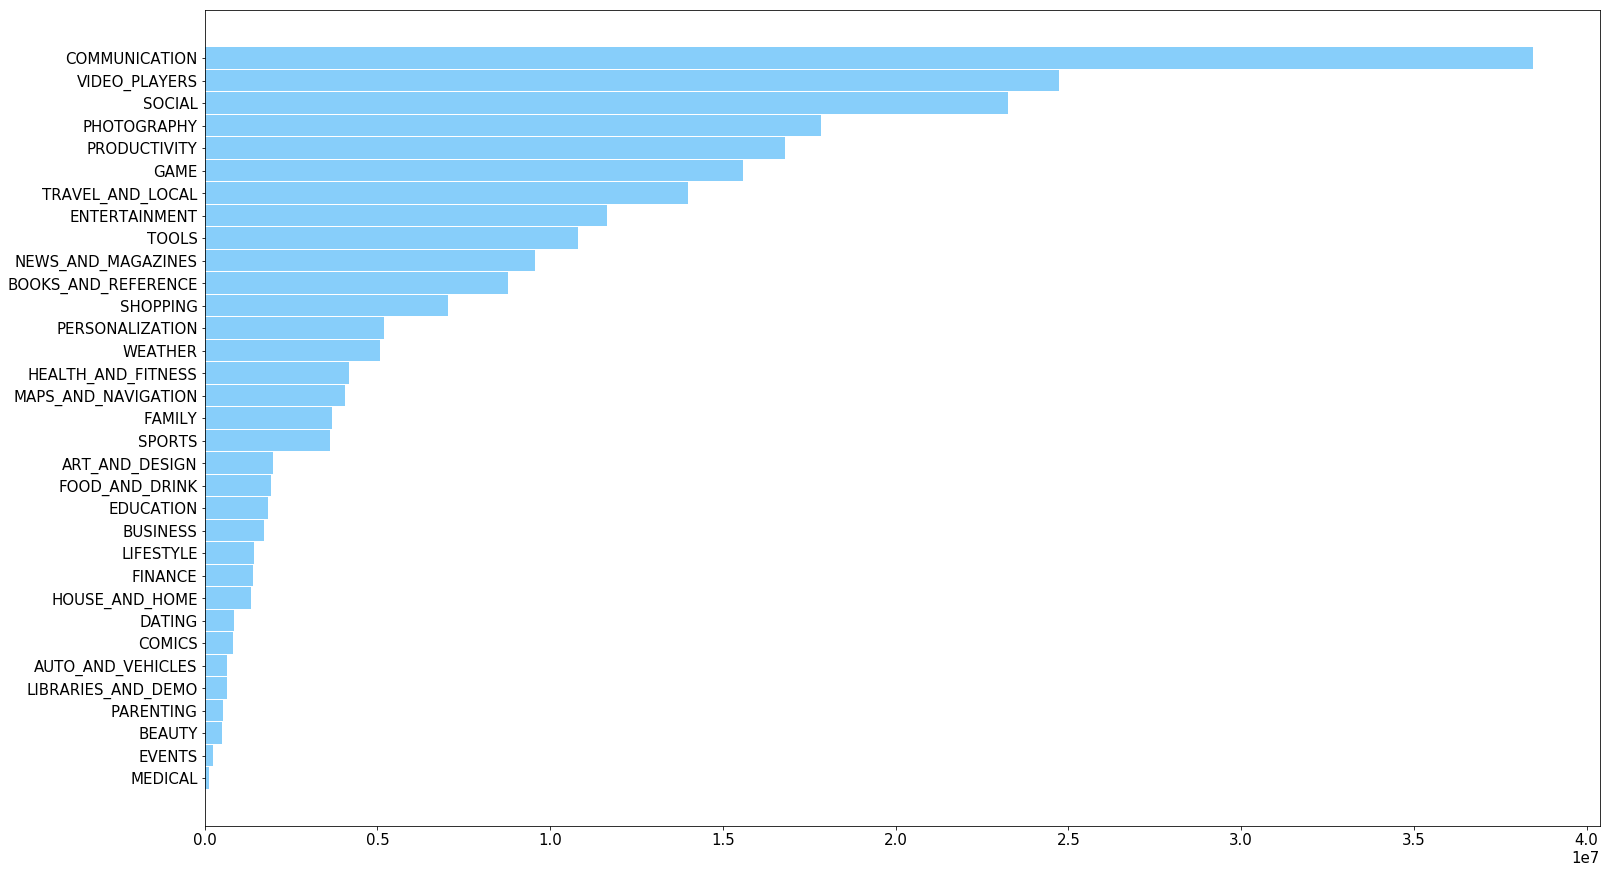

In [33]:
display_chart(key=avg_android.keys(),value=avg_android.values())

On average, `Communication` apps have the most installs (38456119). Yet, this result is heavily skewed by the number of installs of the popular apps. We notice the same pattern for the `Video_players` and `Social` genres.

In [34]:
def app(dataset, index_app, index_genre, index_tot, genre):
    apps={}
    for row in dataset:
        if row[index_genre]==genre:
            apps[row[index_app]]=row[index_tot]
    apps={k:v for k,v in sorted(apps.items(), key=lambda x:x[1], reverse=True)}
    return apps
com_apps=app(android_final, 0,1,5,'COMMUNICATION')
vid_apps=app(android_final, 0,1,5,'VIDEO_PLAYERS')
social_apps=app(android_final, 0,1,5,'SOCIAL')

In [35]:
com_apps

{'WhatsApp Messenger': 1000000000.0,
 'Messenger – Text and Video Chat for Free': 1000000000.0,
 'Skype - free IM & video calls': 1000000000.0,
 'Google Chrome: Fast & Secure': 1000000000.0,
 'Gmail': 1000000000.0,
 'Hangouts': 1000000000.0,
 'Google Duo - High Quality Video Calls': 500000000.0,
 'imo free video calls and chat': 500000000.0,
 'LINE: Free Calls & Messages': 500000000.0,
 'UC Browser - Fast Download Private & Secure': 500000000.0,
 'Viber Messenger': 500000000.0,
 'imo beta free calls and text': 100000000.0,
 'Android Messages': 100000000.0,
 'Who': 100000000.0,
 'GO SMS Pro - Messenger, Free Themes, Emoji': 100000000.0,
 'Firefox Browser fast & private': 100000000.0,
 'Messenger Lite: Free Calls & Messages': 100000000.0,
 'Kik': 100000000.0,
 'KakaoTalk: Free Calls & Text': 100000000.0,
 'Opera Mini - fast web browser': 100000000.0,
 'Opera Browser: Fast and Secure': 100000000.0,
 'Telegram': 100000000.0,
 'Truecaller: Caller ID, SMS spam blocking & Dialer': 100000000.0

In [36]:
vid_apps

{'YouTube': 1000000000.0,
 'Google Play Movies & TV': 1000000000.0,
 'MX Player': 500000000.0,
 'Motorola Gallery': 100000000.0,
 'VLC for Android': 100000000.0,
 'Dubsmash': 100000000.0,
 'VivaVideo - Video Editor & Photo Movie': 100000000.0,
 'VideoShow-Video Editor, Video Maker, Beauty Camera': 100000000.0,
 'Motorola FM Radio': 100000000.0,
 'Vote for': 50000000.0,
 'Vigo Video': 50000000.0,
 'MiniMovie - Free Video and Slideshow Editor': 50000000.0,
 'Samsung Video Library': 50000000.0,
 'LIKE – Magic Video Maker & Community': 50000000.0,
 'DU Recorder – Screen Recorder, Video Editor, Live': 50000000.0,
 'KineMaster – Pro Video Editor': 50000000.0,
 'VMate': 50000000.0,
 'HD Video Downloader : 2018 Best video mate': 50000000.0,
 'Ringdroid': 50000000.0,
 'Video Downloader': 10000000.0,
 'Video Player All Format': 10000000.0,
 'Code': 10000000.0,
 'Music - Mp3 Player': 10000000.0,
 'YouTube Studio': 10000000.0,
 'video player for android': 10000000.0,
 'HTC Service － DLNA': 1000000

In [37]:
social_apps

{'Facebook': 1000000000.0,
 'Google+': 1000000000.0,
 'Instagram': 1000000000.0,
 'Facebook Lite': 500000000.0,
 'Snapchat': 500000000.0,
 'Tumblr': 100000000.0,
 'Pinterest': 100000000.0,
 'Badoo - Free Chat & Dating App': 100000000.0,
 'Tango - Live Video Broadcast': 100000000.0,
 'LinkedIn': 100000000.0,
 'Tik Tok - including musical.ly': 100000000.0,
 'BIGO LIVE - Live Stream': 100000000.0,
 'VK': 100000000.0,
 'ooVoo Video Calls, Messaging & Stories': 50000000.0,
 'MeetMe: Chat & Meet New People': 50000000.0,
 'Zello PTT Walkie Talkie': 50000000.0,
 'POF Free Dating App': 50000000.0,
 'SKOUT - Meet, Chat, Go Live': 50000000.0,
 'TextNow - free text + calls': 10000000.0,
 'LiveMe - Video chat, new friends, and make money': 10000000.0,
 'HTC Social Plugin - Facebook': 10000000.0,
 'Quora': 10000000.0,
 'Kate Mobile for VK': 10000000.0,
 'Text Me: Text Free, Call Free, Second Phone Number': 10000000.0,
 'Text free - Free Text + Call': 10000000.0,
 'YouNow: Live Stream Video Chat': 10

If we remove all the apps that have over 500 millions installs, we will obtain a different result, and hopefully, less biaised.

On the Google Play market, after some filterings, we can see that `Photography`, `Productivity` and `Game` apps show some potentials.

In [38]:
android_under500=[]
for row in android_final:
    if not ((row[1] in ('COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL')) and (row[5]>100000000.0)):
        android_under500.append(row)

avg_android_2=cal_avg(dataset=android_under500, dict_genre=cat_android, index_genre=1, index_tot=5)
for k, v in avg_android_2.items():
    print(k,':',v)

PHOTOGRAPHY : 17840110.4
PRODUCTIVITY : 16787331.34
GAME : 15588015.6
TRAVEL_AND_LOCAL : 13984077.71
ENTERTAINMENT : 11640705.88
TOOLS : 10801391.3
NEWS_AND_MAGAZINES : 9549178.47
COMMUNICATION : 9191689.13
VIDEO_PLAYERS : 9177767.44
BOOKS_AND_REFERENCE : 8767811.89
SHOPPING : 7036877.31
SOCIAL : 6440960.61
PERSONALIZATION : 5201482.61
WEATHER : 5074486.2
HEALTH_AND_FITNESS : 4188821.99
MAPS_AND_NAVIGATION : 4056941.77
FAMILY : 3695641.82
SPORTS : 3638640.14
ART_AND_DESIGN : 1986335.09
FOOD_AND_DRINK : 1924897.74
EDUCATION : 1833495.15
BUSINESS : 1712290.15
LIFESTYLE : 1437816.27
FINANCE : 1387692.48
HOUSE_AND_HOME : 1331540.56
DATING : 854028.83
COMICS : 817657.27
AUTO_AND_VEHICLES : 647317.82
LIBRARIES_AND_DEMO : 638503.73
PARENTING : 542603.62
BEAUTY : 513151.89
EVENTS : 253542.22
MEDICAL : 120550.62


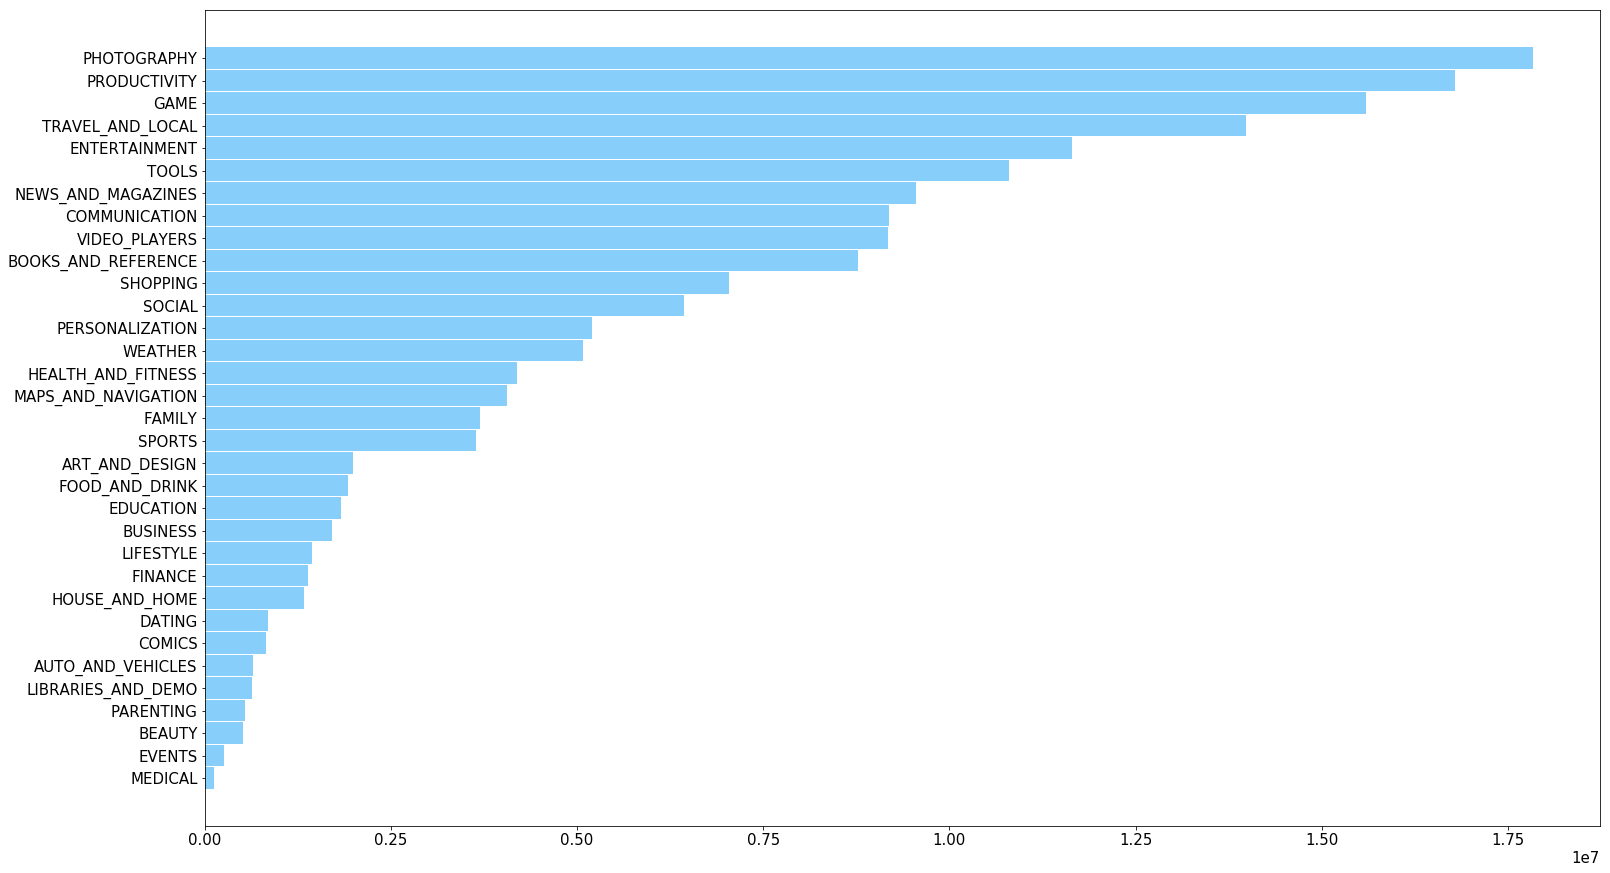

In [39]:
display_chart(key=avg_android_2.keys(),value=avg_android_2.values())

The game genre seems pretty popular, even though this part of the market seems a bit saturated, we can still develop a game that has potential because there's a wide variety of categories.  
In addition, we noticed that on the iOS market, users seems to find game guides useful, especially for the popular title like 'Minecraft' or 'Pokemon GO', and the `Book and reference` is fairly popular on the Google Play market. We can either invent a new game with a unique gameplay or a guide apps for popular game titles.

### Conclusions

In this project, we analyzed the data about the App Store and Google Play with the goal of recommending an app profile that can be profitable for both markets.  
We have concluded that building a new and unique game or a guide app for popular game titles could be profitable. Since the markets are already full of games, we need to do some research to be able to develop an exceptional gameplay. Doing a game guide is also another solution since new games are released every year.  